true b1 : 2.5
true b0 : -7
calculated b1 : 2.5451230499852984
calculated b0 : -7.144125486986667


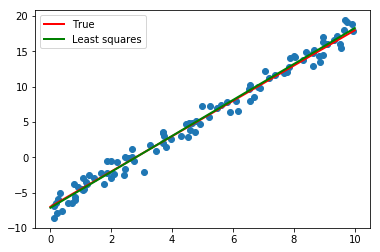

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def generate_data(b1, b0, size, x_range=(-10, 10), noise_mean=0,
                  noise_std=1):
    """
    input:
    b1, b0 - true parameters of data
    size - size of data, numbers of samples
    x_range - tuple of (min, max) x-values
    noise_mean - noise mean value
    noise_std - noise standard deviation

    output:
    data_x, data_y - data features
    """
    noise = np.random.normal(noise_mean, noise_std, size)
    rnd_vals = np.random.rand(size)
    data_x = x_range[1] * rnd_vals + x_range[0] * (1 - rnd_vals)
    data_y = b1 * data_x + b0 + noise

    return data_x, data_y


def least_squares(x, y):
    """
    input:
    x, y - data features

    output:
    b1, b0 - predicted parameters of data
    """
    mean_x = x.mean()
    mean_y = y.mean()

    b1 = np.dot(y - mean_y, x - mean_x) / np.dot(x - mean_x, x - mean_x)
    b0 = mean_y - b1 * mean_x

    return b1, b0


def animate(data_x, data_y, true_b1, true_b0, b1, b0, x_range=(-10, 10),
            label="Least squares"):
    plt.scatter(data_x, data_y)
    plt.plot([x_range[0], x_range[1]],
             [x_range[0] * true_b1 + true_b0, x_range[1] * true_b1 + true_b0],
             c="r", linewidth=2, label="True")
    plt.plot([x_range[0], x_range[1]],
             [x_range[0] * b1 + b0, x_range[1] * b1 + b0],
             c="g", linewidth=2, label=label)
    plt.legend()
    plt.show()


### Parameters for data generation ###
true_b1 = 2.5
true_b0 = -7
size = 100
x_range = (0, 10)
noise_mean = 0
noise_std = 1

# Generate the data
data_x, data_y = generate_data(true_b1, true_b0, size,
                               x_range=x_range,
                               noise_mean=noise_mean,
                               noise_std=noise_std)

# Predict data's parameters
b1, b0 = least_squares(data_x, data_y)

# Visualize the data
print("true b1 : {}\ntrue b0 : {}".format(true_b1, true_b0))
print("calculated b1 : {}\ncalculated b0 : {}".format(b1, b0))
animate(data_x, data_y, true_b1, true_b0, b1, b0, x_range=x_range)
